<a href="https://colab.research.google.com/github/Jose-Bruno/ProcessamentoDigitalDeImagens/blob/main/Projeto_Final_Jos%C3%A9_Bruno_da_Silva_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

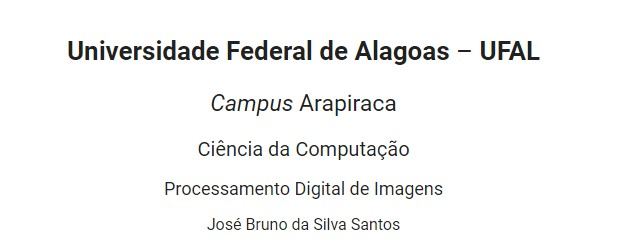

In [291]:
import numpy as np
import cv2
import json
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [292]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Morfologia Matemática para Processamento de Imagens**


> Morfologia matemática para processamento de imagem é uma ferramenta
matemática que utiliza-se dos conceitos de teoria dos conjuntos para manipular
imagens com o objetivo de remover elementos indesejados, extrair componentes
desejadas, etc. Por tanto, essa é uma ferramenta muito interessante de ser utilizada
nas etapas de pré-processamento de imagens.


> Os exemplos utilizados aqui, estão levando em consideração um espaço euclidiano
bidimensional. Por tanto, estamos trabalhando com imagens binárias onde 1 = pixel
branco e 0 = pixel preto (o que caracteriza uma imagem binária).





# **Video da Explicação**



> Para assistir o video da explicação clique [aqui](https://www.youtube.com/watch?v=ujAAKe6ZjS8&list=PLYDsgs3UPVrL0HaIt2-jOI6HOUT7dVguX)



# ***Imagens Utilizadas***



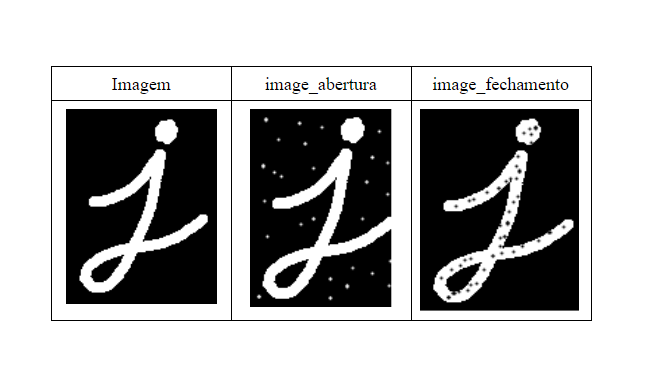

In [309]:
imagem  = "/content/drive/MyDrive/Colab Notebooks/Imagens/image.png"
image_abertura = "/content/drive/MyDrive/Colab Notebooks/Imagens/abertura.png"
image_fechamento = "/content/drive/MyDrive/Colab Notebooks/Imagens/fechamento.png"

# **Binarizar a imagem**

In [294]:
def binarizar_a_imagem(imagem):
    img = cv2.imread(imagem, 0)

    converter= np.where((img <= 127), img, 255)
    converter_branco = np.where((converter > 127), converter, 0)

    return converter_branco

In [295]:
img = binarizar_a_imagem(imagem)
elemento_estruturante = [[255,255,255,255,255],[255,255,255,255,255],[255,255,255,255,255],[255,255,255,255,255],[255,255,255,255,255]]

# **Erosão**


> A operação de erosão, funciona de forma análoga a uma erosão de solo. Teremos
uma porção de solo que é representado por todos os (x,y) pertencentes ao nosso
conjunto A, e teremos um fluido que é representado pelo elemento estruturante.
Quando o fluido for passando pela borda do solo, o mesmo irá erodir restando uma
porção de solo menor que a porção original.



In [296]:
def erosao(imagem, elemento_estruturante):
    img = imagem
    forma_img = img.shape
    tamanho_elemento = len(elemento_estruturante)
    tamanho_imagem = np.pad(array=img, pad_width=tamanho_elemento, mode='constant')
    forma_elemento = tamanho_imagem.shape
    altura, largura = (forma_elemento[0] - forma_img[0]), (forma_elemento[1] - forma_img[1])
    submatrizes = np.array([
        tamanho_imagem[i:(i + len(elemento_estruturante)), j:(j + len(elemento_estruturante))]
        for i in range(forma_elemento[0] - altura) for j in range(forma_elemento[1] - largura)
    ])

    erosao_img = np.array([255 if (i == elemento_estruturante).all() else 0 for i in submatrizes])
    erosao_img = erosao_img.reshape(forma_img)
    return erosao_img

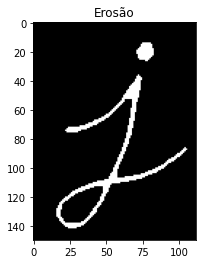

In [297]:
imagem_erosao = erosao(img, elemento_estruturante = elemento_estruturante)
plt.imshow(imagem_erosao,'gray')
plt.title('Erosão')
plt.show()

# **Dilatação**

> A dilatação é o oposto da erosão. Por tanto, no local onde o elemento estruturante
estiver passando (contorno dos pixels brancos) todos píxeis pretos serão
transformados em brancos. Ou seja, para todo (x,y) = 0 onde o elemento
estruturante estiver passando, serão transformados em (x,y) = 1.




In [298]:
def dilatacao(imagem, elemento_estruturante):
    
    img = imagem
    forma_img = img.shape
    tamanho_elemento = len(elemento_estruturante) - 2
    tamanho_imagem = np.pad(array=img, pad_width=tamanho_elemento, mode='constant')
    forma_elemento = tamanho_imagem.shape
    altura, largura = (forma_elemento[0] - forma_img[0]), (forma_elemento[1] - forma_img[1])
    submatrizes = np.array([
        tamanho_imagem[i:(i + len(elemento_estruturante)), j:(j + len(elemento_estruturante))]
        for i in range(forma_elemento[0] - altura) for j in range(forma_elemento[1] - largura)
    ])
    
    imagem_dilatada = np.array([255 if (i == elemento_estruturante).any() else 0 for i in submatrizes])
    imagem_dilatada = imagem_dilatada.reshape(forma_img)
    return imagem_dilatada

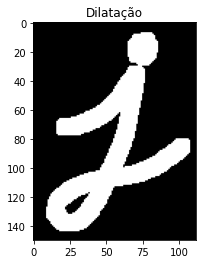

In [299]:
imagem_dilatada = dilatacao(imagem=img, elemento_estruturante=elemento_estruturante)
plt.imshow(imagem_dilatada,'gray')
plt.title('Dilatação')
plt.show()

# **Abertura**


> A operação de abertura representa a erosão seguida da dilatação. Como a erosão é
capaz de remover detalhes que sejam menores que o elemento estruturante, e a
dilatação é capaz de expandir elementos, quando se utiliza a abertura podemos
remover ruídos externos à região de interesse.



In [300]:
def abertura(imagem, elemento_estruturante):
    imagem_erosao = erosao(imagem, elemento_estruturante)
    imagem_dilatada = dilatacao(imagem_erosao, elemento_estruturante)
    return imagem_dilatada

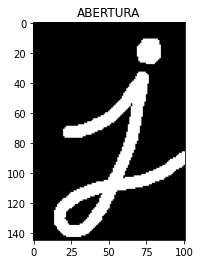

In [301]:
img_abertura = binarizar_a_imagem(image_abertura)
imagem_abertura = abertura(img_abertura, elemento_estruturante)
plt.imshow(imagem_abertura,'gray')
plt.title('ABERTURA')
plt.show()

# **Fechamento**


> A operação de fechamento é a sequência inversa da abertura. Executa-se uma
dilatação seguida de uma erosão. Dessa forma, conseguimos eliminar ruídos
internos à região de interesse.



In [302]:
def fechamento(imagem, elemento_estruturante):
    imagem_dilatada = dilatacao(imagem, elemento_estruturante)
    imagem_erosao = erosao(imagem_dilatada, elemento_estruturante)
    return imagem_erosao

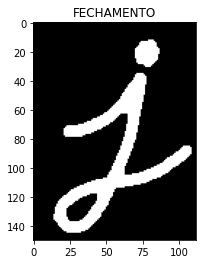

In [303]:
img_fechamento = binarizar_a_imagem(image_fechamento)
imagem_fechamento = fechamento(imagem=img, elemento_estruturante=elemento_estruturante)
plt.imshow(imagem_fechamento,'gray')
plt.title('FECHAMENTO')
plt.show()

TypeError: ignored

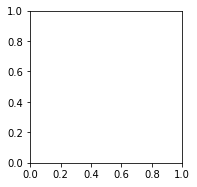

In [307]:
fig = plt.figure()

fig1 = fig.add_subplot(1,2,1)
fig1.imshow(image_fechamento, cmap="gray")


fig2 = fig.add_subplot(1,2,1)
fig2.imshow(imagem_fechamento, cmap="gray")


Text(0.5, 1.0, 'DILATÇÃO')

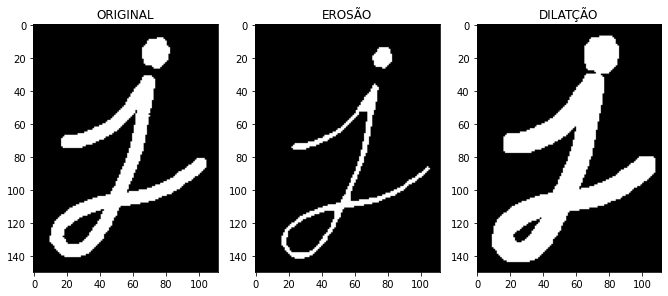

In [304]:
fig = plt.figure(figsize=(6.4 * 3, 4.8 * 3), constrained_layout=False)

# Imagem original
fig1 = fig.add_subplot(1, 5, 1)
fig1.imshow(img, cmap="gray")
plt.title("ORIGINAL")

# Erosão
fig2 = fig.add_subplot(1, 5, 2)
fig2.imshow(imagem_erosao, cmap="gray")
plt.title("EROSÃO")

# Erosão
fig3 = fig.add_subplot(1, 5, 3)
fig3.imshow(imagem_dilatada, cmap="gray")
plt.title("DILATÇÃO")